In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

#importing functions from another 
import import_ipynb

# Signal processing functions made this week

In [2]:
#Takes the 1D sequence (x) and a downsample factor (D) and an offset (default None) and computes the downsampled (and offset) sequence. 
# def downsample(x, D, offset = None):
#     k = offset
#     if k == None:
#         y = [x[i*D] for i in range(int(len(x)/D)+1)]
#     else:
#         temp = [*x[k:],*x[:k]] #Wrap list: The 'offset' first values are appended to the end. 
#         y = [temp[i*D] for i in range(int(len(temp)/D)+1)]
#     return y

def downsample(x, D, offset = None):
    k = offset
    if k == None:
        y = [x[i*D] for i in range(int(len(x)/D))]
    else:
        temp = [*x[k:],*x[:k]] #Wrap list: The 'offset' first values are appended to the end. 
        y = [temp[i*D] for i in range(int(len(temp)/D))]
    return y

def upsample(x, I):
    zeros = [0 for i in range(I-1)]
    y = []
    for i in range(len(x)):
        y = np.append(y, [x[i], *zeros])
        y = np.array(y).reshape(I*(i+1))
    return y

def linInterp(data, I):
    w = [] #Triangular convolution window
    for x in range(-I+1, I):
        w.append(1-abs(x)/I)
    wf = np.flip(w)
    x = [*[0 for _ in range(I-1)], *data]
    y = [sum(x[i:i+len(wf)] * wf) for i in range(len(x)-len(wf)+1)]
    return y

def delay(x, nSampDelay):
    zeros = [0 for _ in range(nSampDelay)]
    x = x[:-nSampDelay]
    y = [*zeros, *x]
    return y

def convolve_1d(data, w, neg_start_idx = None): #If the window has a negative index, a padding of 0s can be added to the sequence. 
    wf = np.flip(w)
    I = len(w)
    xdata = [*data, *[0 for i in range(I-1)]]
    if neg_start_idx:
        x_idx = [*[0 for _ in range(neg_start_idx)], *xdata]
        y = [sum(x_idx[i:i+len(wf)] * wf) for i in range(len(x_idx)-len(wf)+1)]
    else:
        y = [sum(xdata[i:i+len(wf)] * wf) for i in range(len(xdata)-len(wf)+1)]
    return y

# Problems from the book

### Problem 12.21

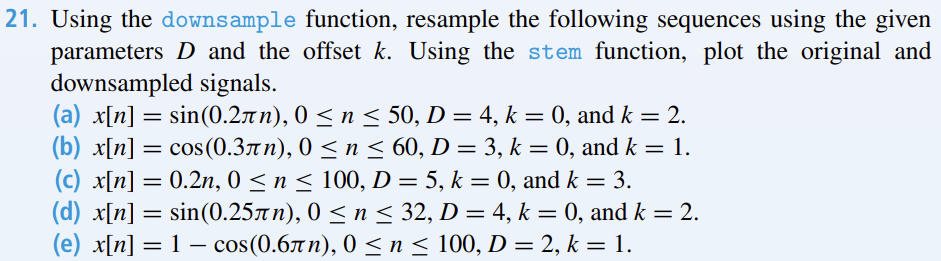

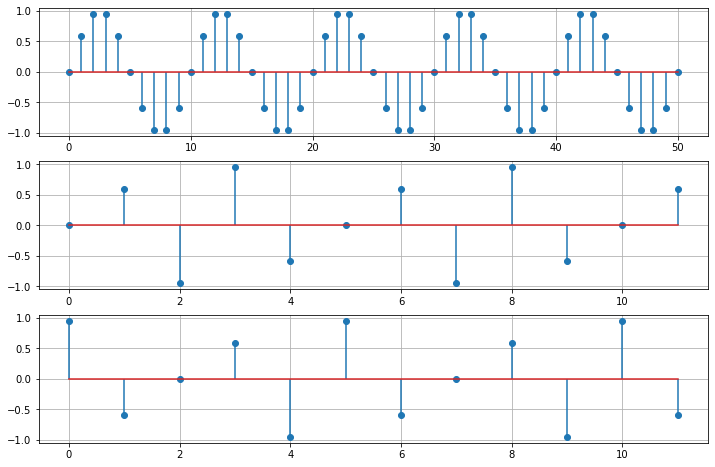

In [3]:
na = np.linspace(0,50,51)
xa = np.sin(0.2*np.pi*na)
ya = downsample(xa,4)
ya_offset = downsample(xa,4,2)
fig, ax = plt.subplots(3,1,figsize=(12,8))
ax[0].stem(xa)
ax[1].stem(ya)
ax[2].stem(ya_offset)
for a in ax:
    a.set_ylim(min(xa)-0.1*max(xa), max(xa)+0.1*max(xa))
    a.grid()
plt.show()

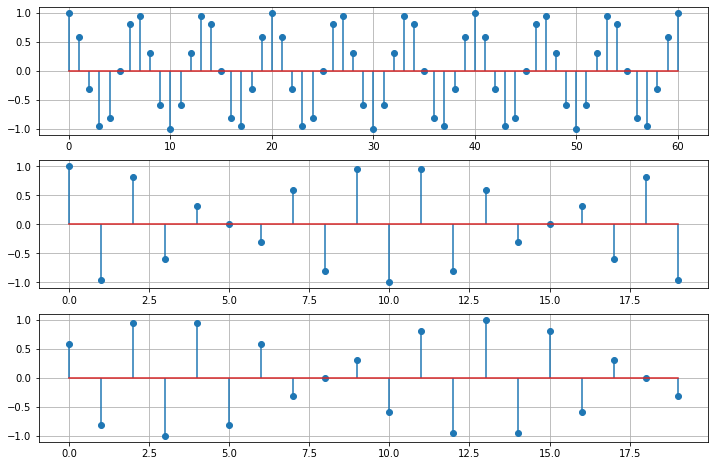

In [4]:
nb = np.linspace(0,60,61)
xb = np.cos(0.3*np.pi*nb)
yb = downsample(xb,3)
yb_offset = downsample(xb,3,1)
fig, ax = plt.subplots(3,1,figsize=(12,8))
ax[0].stem(xb)
ax[1].stem(yb)
ax[2].stem(yb_offset)
for a in ax:
    a.set_ylim(min(xb)-0.1*max(xb), max(xb)+0.1*max(xb))
    a.grid()
plt.show()

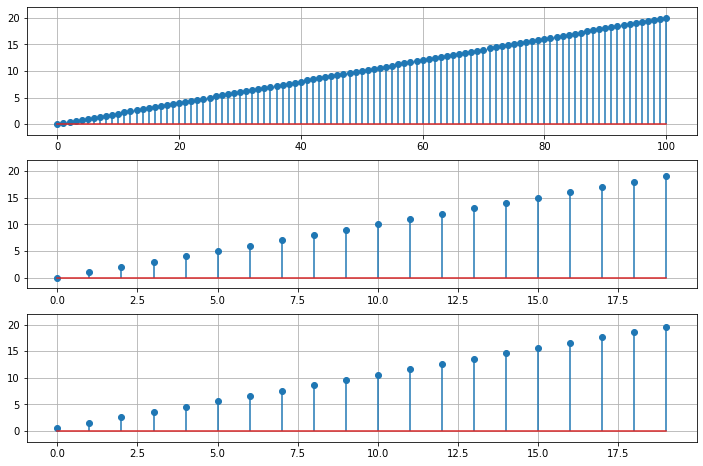

In [5]:
nc = np.linspace(0,100,101)
xc = 0.2*nc
yc = downsample(xc,5)
yc_offset = downsample(xc,5,3)
fig, ax = plt.subplots(3,1,figsize=(12,8))
ax[0].stem(xc)
ax[1].stem(yc)
ax[2].stem(yc_offset)
for a in ax:
    a.set_ylim(min(xc)-0.1*max(xc), max(xc)+0.1*max(xc))
    a.grid()
plt.show()

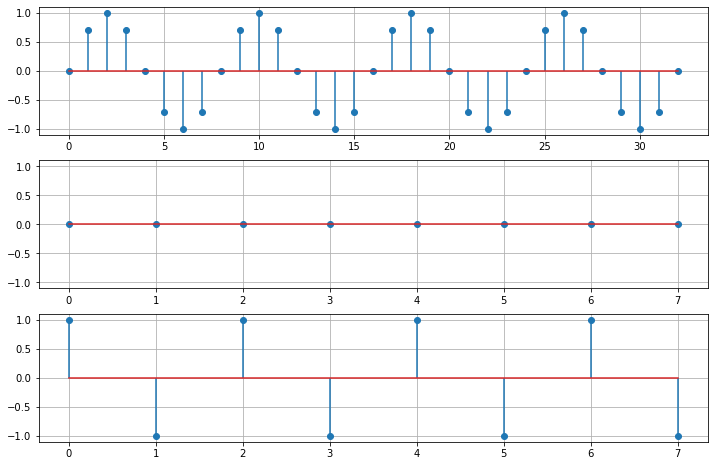

In [6]:
nd = np.linspace(0,32,33)
xd = np.sin(0.25*np.pi*nd)
yd = downsample(xd,4)
yd_offset = downsample(xd,4,2)
fig, ax = plt.subplots(3,1,figsize=(12,8))
ax[0].stem(xd)
ax[1].stem(yd)
ax[2].stem(yd_offset)
for a in ax:
    a.set_ylim(min(xd)-0.1*max(xd), max(xd)+0.1*max(xd))
    a.grid()
plt.show()

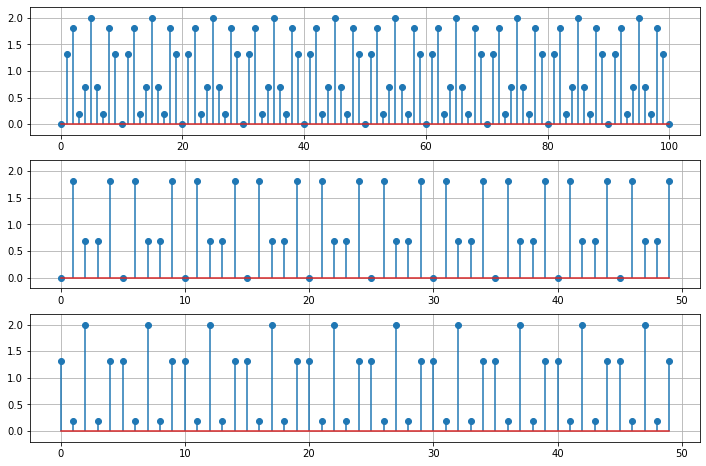

In [7]:
ne = np.linspace(0,100,101)
xe = 1-np.cos(0.6*np.pi*ne)
ye = downsample(xe,2)
ye_offset = downsample(xe,2,1)
fig, ax = plt.subplots(3,1,figsize=(12,8))
ax[0].stem(xe)
ax[1].stem(ye)
ax[2].stem(ye_offset)
for a in ax:
    a.set_ylim(min(xe)-0.1*max(xe), max(xe)+0.1*max(xe))
    a.grid()
plt.show()

### Problem 12.22

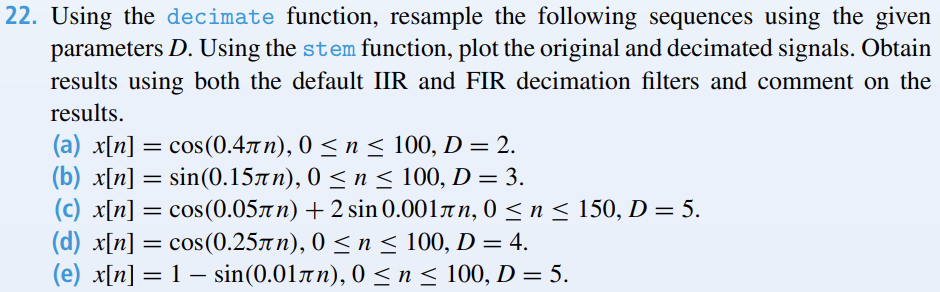

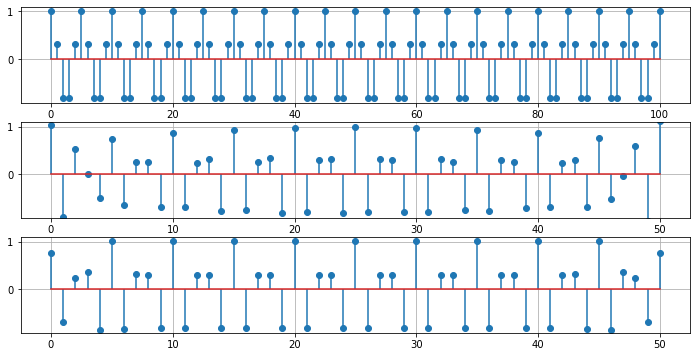

In [8]:
na = np.linspace(0,100,101)
xa = np.cos(0.4*np.pi*na)
Da = 2
ya_iir = sig.decimate(xa, Da, ftype='iir')
ya_fir = sig.decimate(xa, Da, ftype='fir')
fig, ax = plt.subplots(3,1, figsize=(12,6))
ax[0].stem(xa)
ax[1].stem(ya_iir)
ax[2].stem(ya_fir)
for a in ax:
    a.set_ylim(min(xa)-0.1*max(xa), max(xa)+0.1*max(xa))
    a.grid()
plt.show()

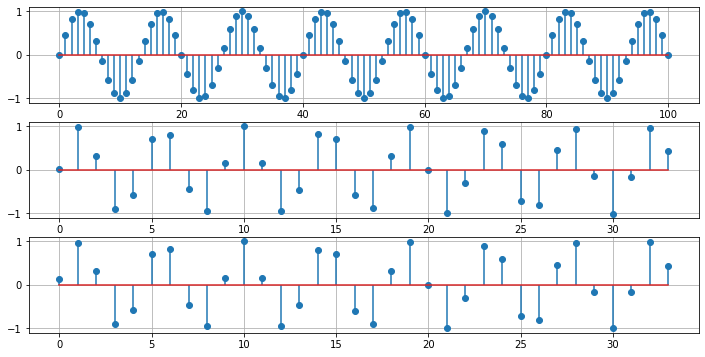

In [9]:
nb = np.linspace(0,100,101)
xb = np.sin(0.15*np.pi*nb)
Db = 3
yb_iir = sig.decimate(xb, Db, ftype='iir')
yb_fir = sig.decimate(xb, Db, ftype='fir')
fig, ax = plt.subplots(3,1, figsize=(12,6))
ax[0].stem(xb)
ax[1].stem(yb_iir)
ax[2].stem(yb_fir)
for a in ax:
    a.set_ylim(min(xb)-0.1*max(xb), max(xb)+0.1*max(xb))
    a.grid()
plt.show()

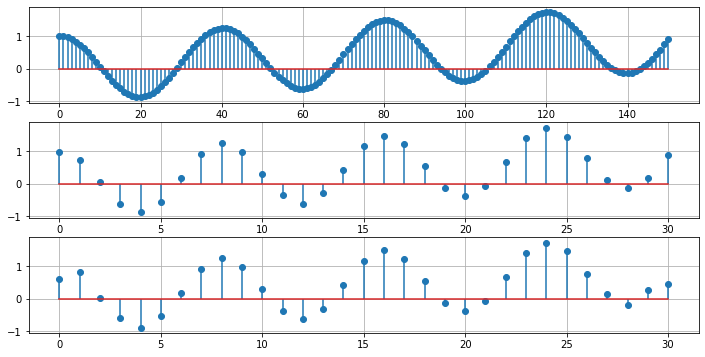

In [10]:
nc = np.linspace(0,150,151)
xc = np.cos(0.05*np.pi*nc) + 2*np.sin(0.001*np.pi*nc)
Dc = 5
yc_iir = sig.decimate(xc, Dc, ftype='iir')
yc_fir = sig.decimate(xc, Dc, ftype='fir')
fig, ax = plt.subplots(3,1, figsize=(12,6))
ax[0].stem(xc)
ax[1].stem(yc_iir)
ax[2].stem(yc_fir)
for a in ax:
    a.set_ylim(min(xc)-0.1*max(xc), max(xc)+0.1*max(xc))
    a.grid()
plt.show()

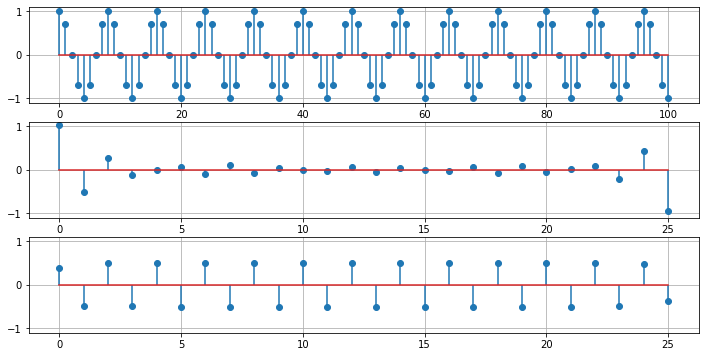

In [11]:
nd = np.linspace(0,100,101)
xd = np.cos(0.25*np.pi*nd)
Dd = 4
yd_iir = sig.decimate(xd, Dd, ftype='iir')
yd_fir = sig.decimate(xd, Dd, ftype='fir')
fig, ax = plt.subplots(3,1, figsize=(12,6))
ax[0].stem(xd)
ax[1].stem(yd_iir)
ax[2].stem(yd_fir)
for a in ax:
    a.set_ylim(min(xd)-0.1*max(xd), max(xd)+0.1*max(xd))
    a.grid()
plt.show()

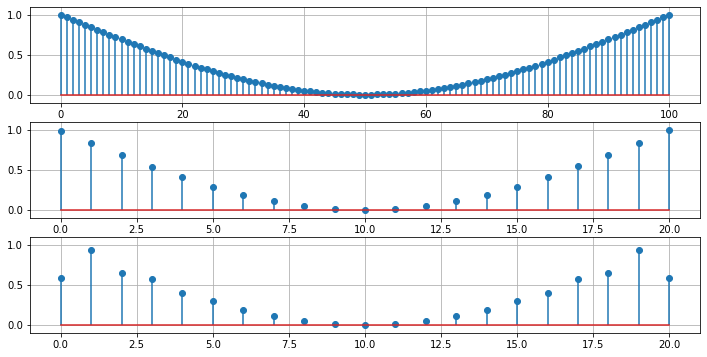

In [12]:
ne = np.linspace(0,100,101)
xe = 1 - np.sin(0.01*np.pi*ne)
De = 5
ye_iir = sig.decimate(xe, De, ftype='iir')
ye_fir = sig.decimate(xe, De, ftype='fir')
fig, ax = plt.subplots(3,1, figsize=(12,6))
ax[0].stem(xe)
ax[1].stem(ye_iir)
ax[2].stem(ye_fir)
for a in ax:
    a.set_ylim(min(xe)-0.1*max(xe), max(xe)+0.1*max(xe))
    a.grid()
plt.show()

### Problem 12.19

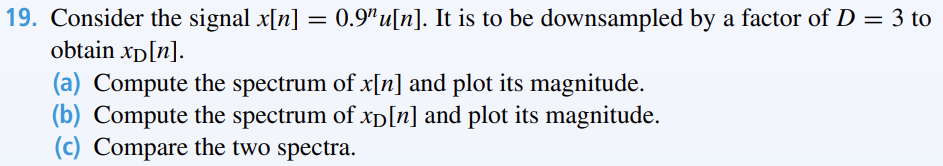

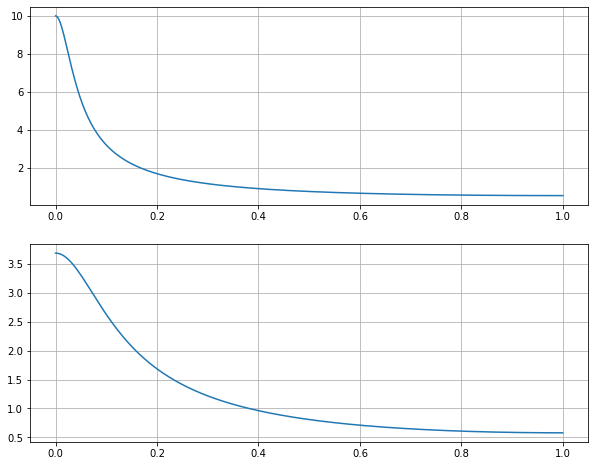

In [13]:
L = 101
n = np.linspace(0,L-1,L)
xn = 0.9**n
w = np.linspace(0,1,501)*np.pi

_, Hx = sig.freqz(xn,1,w)
Hxmag = abs(Hx)

D = 3
yn = downsample(xn, D, 0)

_, Hy = sig.freqz(yn,1,w)
Hymag = abs(Hy)

fig, ax = plt.subplots(2, figsize=(10,8))
ax[0].plot(w/np.pi, Hxmag)
ax[1].plot(w/np.pi, Hymag)
for a in ax:
    a.grid()
plt.show()

### Problem 12.26

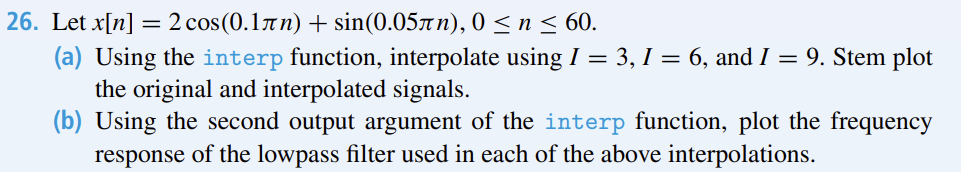

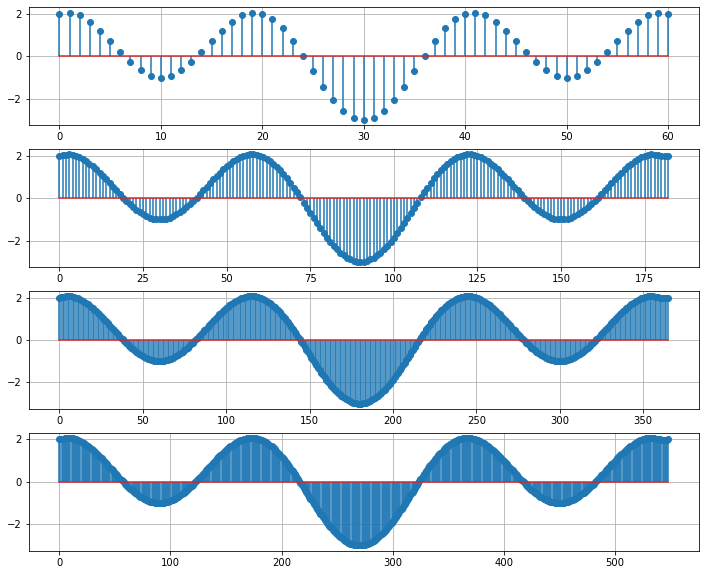

In [14]:
n = np.linspace(0,60,61)
xn = 2*np.cos(0.1*np.pi*n) + np.sin(0.05*np.pi*n)
I1, I2, I3 = 3, 6, 9
num1, num2, num3 = 61*I1, 61*I2, 61*I3
y1 = sig.resample(xn, num1)
y2 = sig.resample(xn, num2)
y3 = sig.resample(xn, num3)

fig, ax = plt.subplots(4,1, figsize=(12,10))
ax[0].stem(xn)
ax[1].stem(y1)
ax[2].stem(y2)
ax[3].stem(y3)
for a in ax:
    a.grid()

# Problems from MultirateProblems PDF

### Problem 1

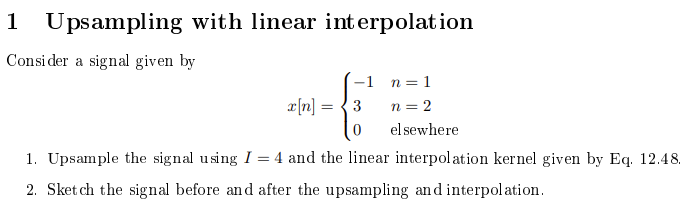

In [15]:
xn = [0, -1, 3, *[0 for i in range(7)]]
I = 4
xn_upsample = upsample(xn, I)
xn_interp = linInterp(xn_upsample, I)

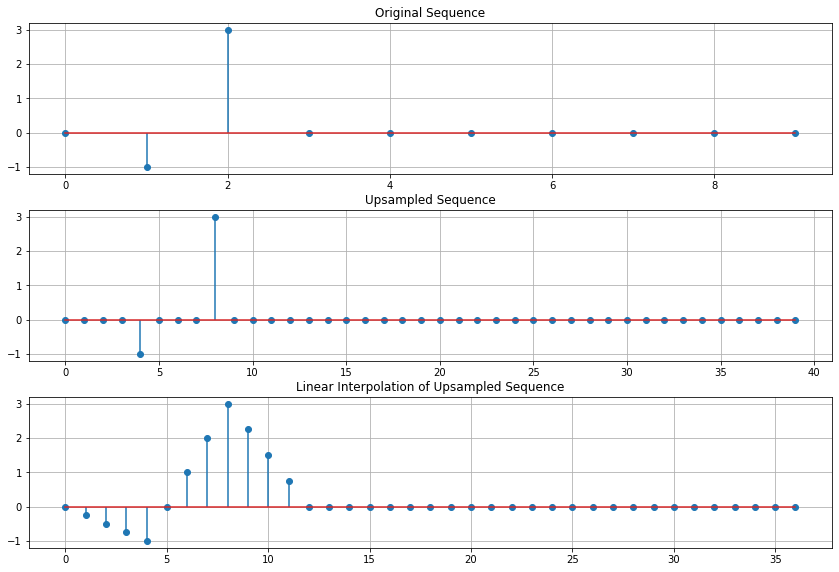

In [16]:
fig, ax = plt.subplots(3,1, figsize=(12,8))
fig.tight_layout(pad=1.5)
ax[0].stem(xn)
ax[0].grid()
ax[0].set_title("Original Sequence")
ax[1].stem(xn_upsample)
ax[1].grid()
ax[1].set_title("Upsampled Sequence")
ax[2].stem(xn_interp)
ax[2].grid()
ax[2].set_title("Linear Interpolation of Upsampled Sequence")
plt.show()

### Problem 2

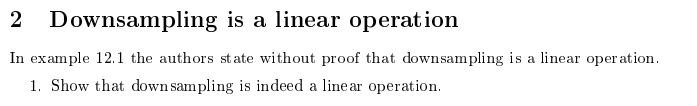

### Problem 3

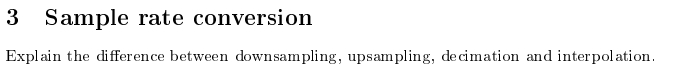

### Problem 4

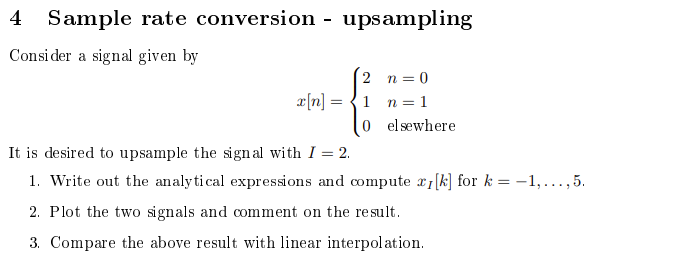

The upsampling process is performed by inserting $I-1$ zeros between each original sample. Hence, the upsampled sequence is:

$$
x_I[k] = [0, 2, 0, 1, 0, 0, 0],\ for\ k = -1,\dots,5 
$$

In [17]:
xn = [2, 1, *[0 for _ in range(5)]]
I = 2
xn_upsamp = upsample(xn, I)
xn_interp = linInterp(xn_upsamp, I) 

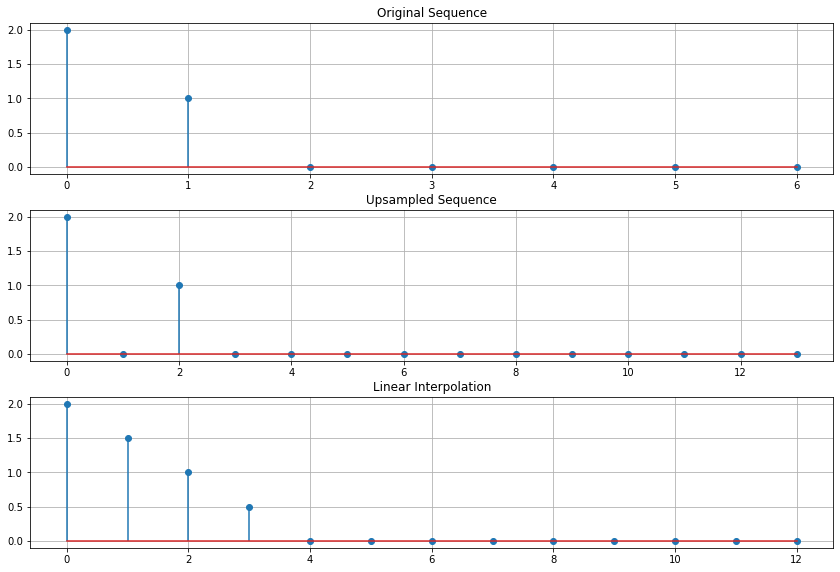

In [18]:
fig, ax = plt.subplots(3,1,figsize=(12,8))
fig.tight_layout(pad=1.5)
ax[0].stem(xn)
ax[0].grid()
ax[0].set_title("Original Sequence")
ax[1].stem(xn_upsamp)
ax[1].grid()
ax[1].set_title("Upsampled Sequence")
ax[2].stem(xn_interp)
ax[2].grid()
ax[2].set_title("Linear Interpolation")
plt.show()

### Problem 5

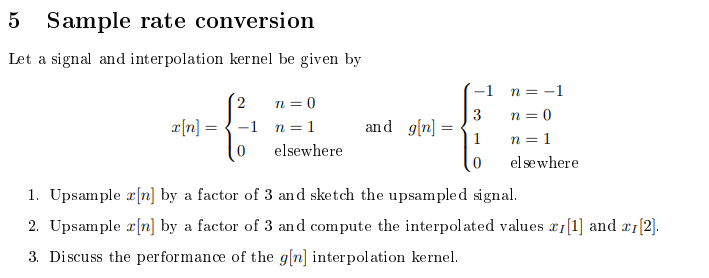

In [28]:
xn = [2, -1, *[0 for _ in range(8)]]
gn = [-1, 3, 1]
I = 3
xn_upsamp = upsample(xn,I)
xn_interp = convolve_1d(xn_upsamp, gn, 1)

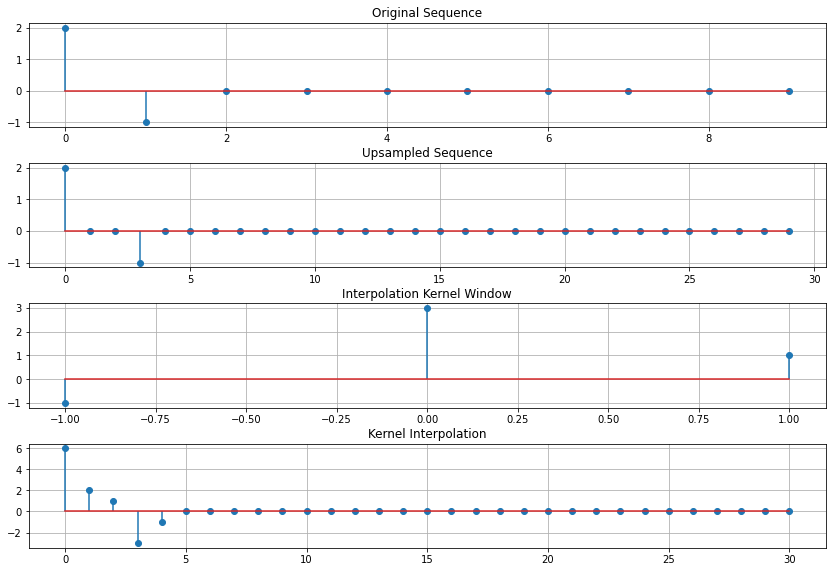

In [29]:
fig, ax = plt.subplots(4,1,figsize=(12,8))
fig.tight_layout(pad=1.5)
ax[0].stem(xn)
ax[0].grid()
ax[0].set_title("Original Sequence")
ax[1].stem(xn_upsamp)
ax[1].grid()
ax[1].set_title("Upsampled Sequence")
ax[2].stem(np.arange(-1,2), gn)
ax[2].grid()
ax[2].set_title("Interpolation Kernel Window")
ax[3].stem(xn_interp)
ax[3].grid()
ax[3].set_title("Kernel Interpolation")
plt.show()

### Problem 6

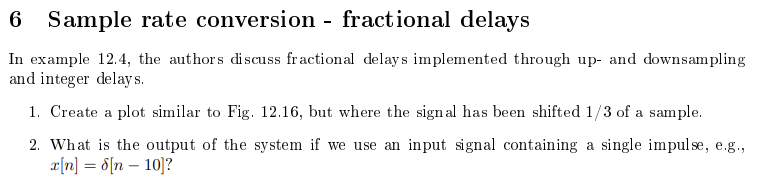

In [21]:
fs = 1000
f1 = 40
f2 = 144
N = 20
n = np.arange(0,N)
D = 3
I = 3
xn = np.cos(2*np.pi*f1/fs*n) + 3*np.sin(2*np.pi*f2/fs*n)
xu = upsample(xn, I) #Upsample
xI = linInterp(xu, I) #Interpolate
xd = delay(xI, 1) #Delay by one sample
xnew = downsample(xd, D) #Downsample

Text(0.5, 1.0, 'Comparison')

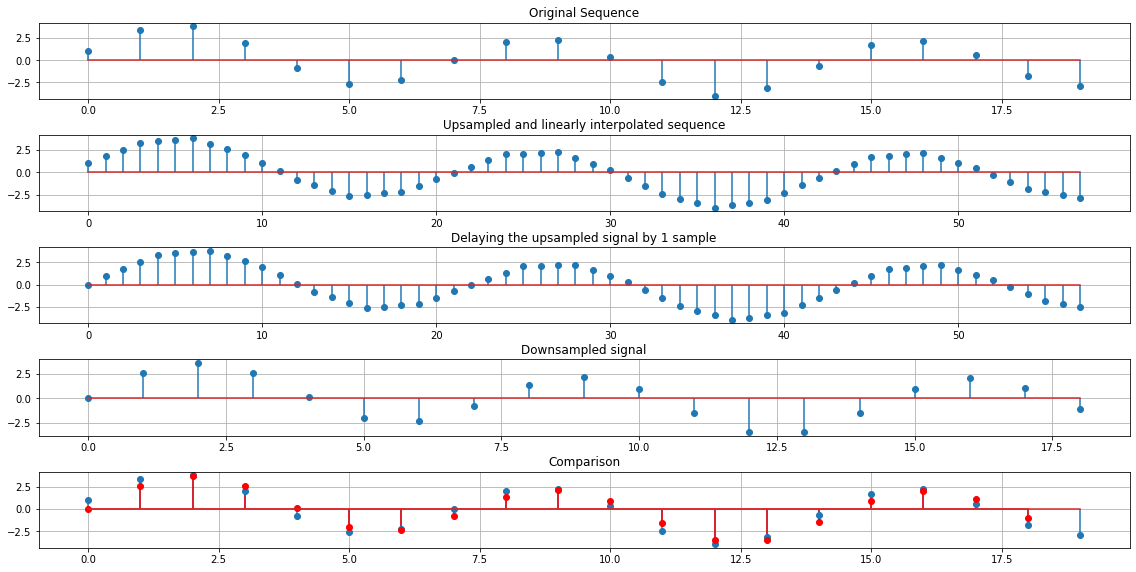

In [22]:
fig, ax = plt.subplots(5,1, figsize=(16,8))
fig.tight_layout(pad=1.5)
ax[0].stem(xn)
ax[0].grid()
ax[0].set_title("Original Sequence")
ax[1].stem(xI)
ax[1].grid()
ax[1].set_title("Upsampled and linearly interpolated sequence")
ax[2].stem(xd)
ax[2].grid()
ax[2].set_title("Delaying the upsampled signal by 1 sample")
ax[3].stem(xnew)
ax[3].grid()
ax[3].set_title("Downsampled signal")
ax[4].stem(xn)
ax[4].stem(xnew, markerfmt='ro', linefmt='r-')
ax[4].grid()
ax[4].set_title("Comparison")

### Problem 7

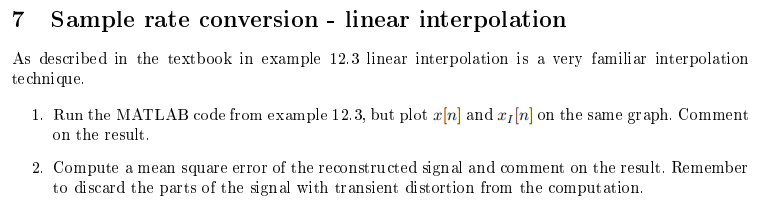

In [23]:
N = 80
n = np.arange(0,N-1)
D = 5
I = 5
xn = np.cos(2*np.pi*0.02*n) + 3*np.sin(2*np.pi*0.0036*n)
xd = downsample(xn, D)
xu = upsample(xd, I)
xi = linInterp(xu, I)

Text(0.5, 1.0, 'Comparison between original and interpolated')

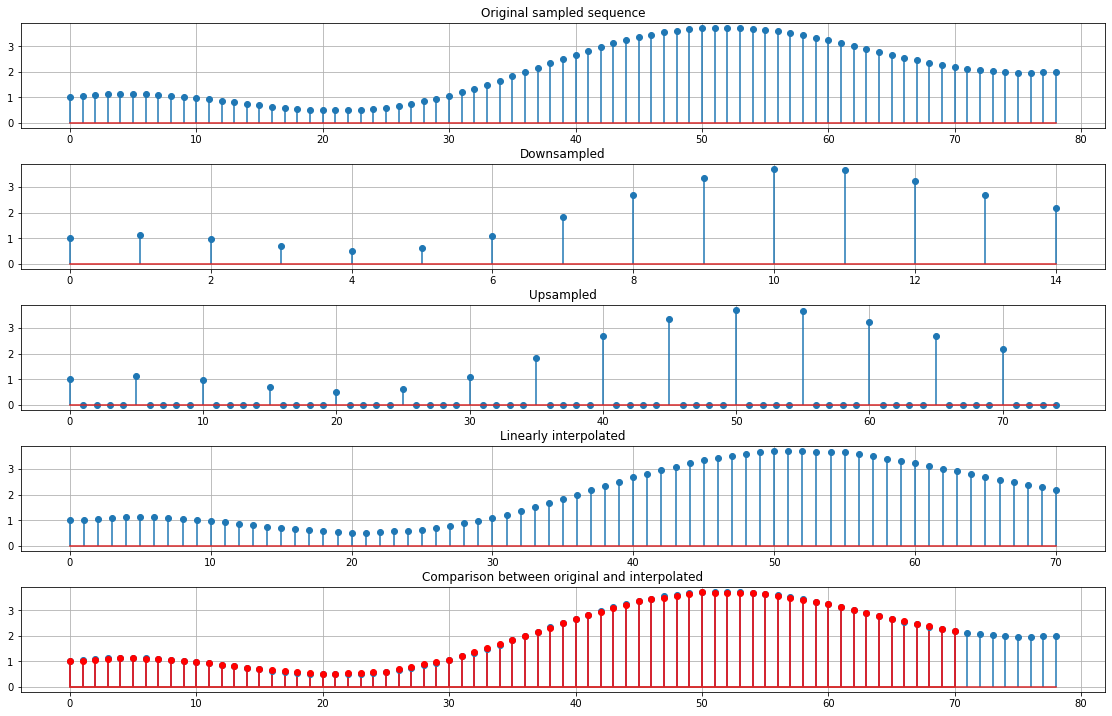

In [27]:
fig, ax = plt.subplots(5,1,figsize=(16,10))
fig.tight_layout(pad=1.5)
ax[0].stem(xn)
ax[0].grid()
ax[0].set_title("Original sampled sequence")
ax[1].stem(xd)
ax[1].grid()
ax[1].set_title("Downsampled")
ax[2].stem(xu)
ax[2].grid()
ax[2].set_title("Upsampled")
ax[3].stem(xi)
ax[3].grid()
ax[3].set_title("Linearly interpolated")
ax[4].stem(xn)
ax[4].stem(xi, markerfmt='ro', linefmt='r-')
ax[4].grid()
ax[4].set_title("Comparison between original and interpolated")

In [25]:
MSE = np.square(np.subtract(xn[:70],xi[:70])).mean() 
RMSE = np.sqrt(MSE)
RMSE

0.02488192755704109